In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
from combined_thresh import combined_thresh

In [2]:
def perspective_transform(img):
	"""
	Execute perspective transform
	"""
	img_size = (img.shape[1], img.shape[0])

	src = np.float32(
		[[200, 720],
		[1100, 720],
		[595, 450],
		[685, 450]])
	dst = np.float32(
		[[300, 720],
		[980, 720],
		[300, 0],
		[980, 0]])

	m = cv2.getPerspectiveTransform(src, dst)
	m_inv = cv2.getPerspectiveTransform(dst, src)

	warped = cv2.warpPerspective(img, m, img_size, flags=cv2.INTER_LINEAR)
	unwarped = cv2.warpPerspective(warped, m_inv, (warped.shape[1], warped.shape[0]), flags=cv2.INTER_LINEAR)  # DEBUG

	return warped, unwarped, m, m_inv



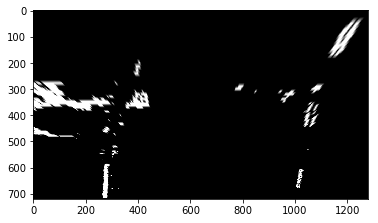

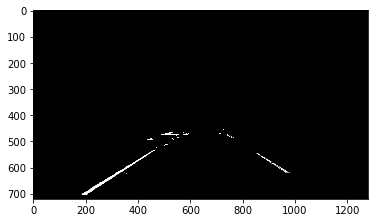

In [3]:
if __name__ == '__main__':
	img_file = 'test_images/test5.jpg'

	with open('calibrate_camera.p', 'rb') as f:
		save_dict = pickle.load(f)
	mtx = save_dict['mtx']
	dist = save_dict['dist']

	img = mpimg.imread(img_file)
	img = cv2.undistort(img, mtx, dist, None, mtx)

	img, abs_bin, mag_bin, dir_bin, hls_bin = combined_thresh(img)

	warped, unwarped, m, m_inv = perspective_transform(img)

	plt.imshow(warped, cmap='gray', vmin=0, vmax=1)
	plt.show()

	plt.imshow(unwarped, cmap='gray', vmin=0, vmax=1)
	plt.show()
